In [15]:
import pandas as pd

# Pré-Processamento
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Fluxo de Pré-Processamento + Extração de Features
from processing.pre_processing import preprocess_nlp

# Pipeline de modelos a serem executados
from modeling.classification import classification_models

# Modelos que serão executados
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

## Leitura da base

In [2]:
# df = pd.read_csv('../dataset/Emocoes.csv', sep = ";", encoding = 'iso8859-1')
df = pd.read_csv('../dataset/NoThemeTweets.csv', sep = ",")

In [3]:
df = df.sample(frac=0.001, replace=True, random_state=20)

In [4]:
df.shape

(786, 5)

In [5]:
df['sentiment'].value_counts()

Negativo    526
Positivo    260
Name: sentiment, dtype: int64

## Chamando pré-processamento

In [6]:
# Instânciando classe para tratamento dos textos
prepro_imdb = preprocess_nlp(df['tweet_text'], lemma=False, wordcloud=True, numeric='tfidf', ngram=3)

In [7]:
stops = ['mim', 'eh', 'vamo', 'deu', 'tb', 'pro', 'oi', 'oq']

for i in stops:
    prepro_imdb.add_stopword(i)

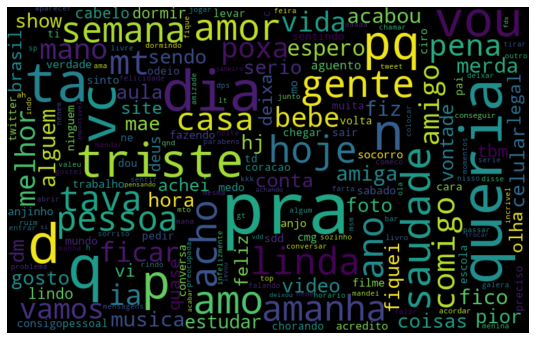

CPU times: user 828 ms, sys: 109 ms, total: 938 ms
Wall time: 942 ms


In [8]:
%%time
# Pegando matriz e textos tratados
sparse_matrix_imdb = prepro_imdb.preprocess()

In [9]:
le = preprocessing.LabelEncoder()
le.fit(df['sentiment'].unique())
df['sentiment'] = le.transform(df['sentiment'])

## Chamando os modelos

In [10]:
models = [
    ("RandomForest", RandomForestClassifier()),
    ("LogisticRegression", LogisticRegression(max_iter = 10000)),
    ("SVC", SVC()),
    ("KNeighborsClassifier", KNeighborsClassifier()),
    ("MultinomialNB", MultinomialNB())
]

In [11]:
mod = classification_models(sparse_matrix_imdb.todense(), df['sentiment'], models)

In [12]:
%%time
mod.k_fold()

CPU times: user 3min 41s, sys: 2min 6s, total: 5min 48s
Wall time: 47.5 s


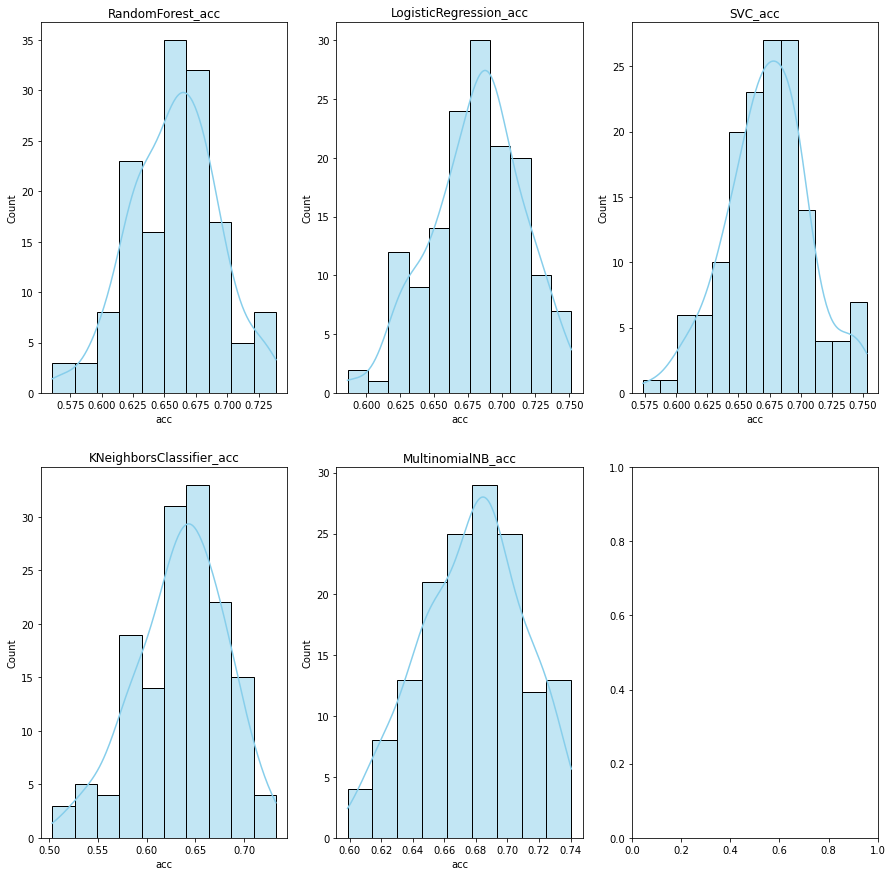

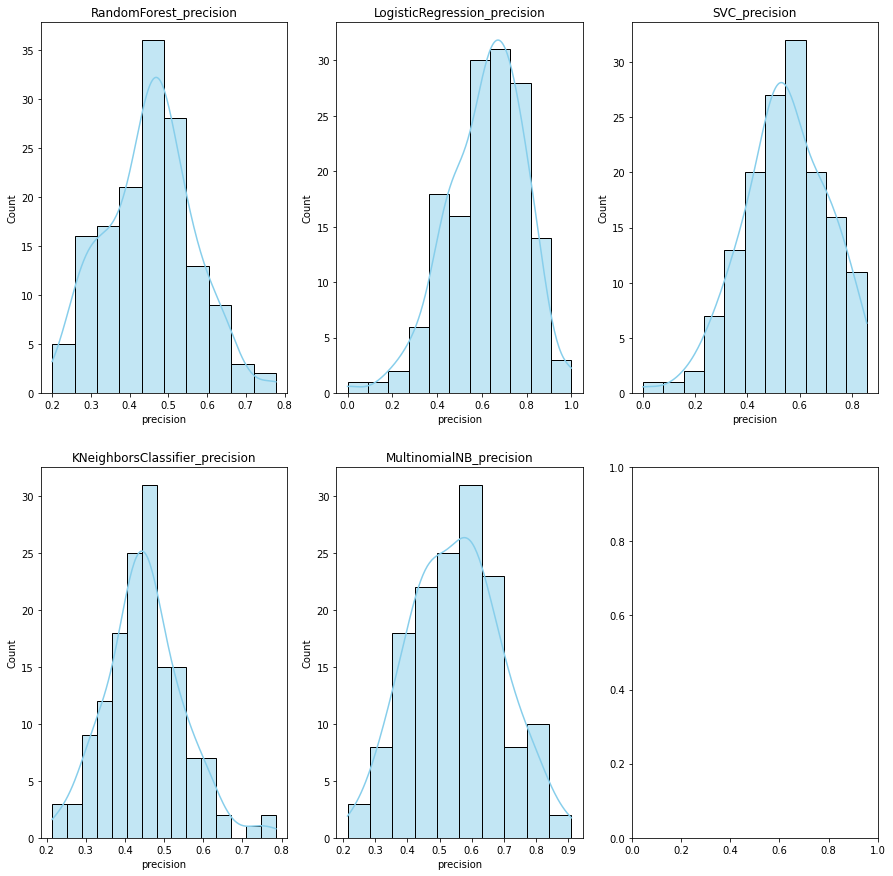

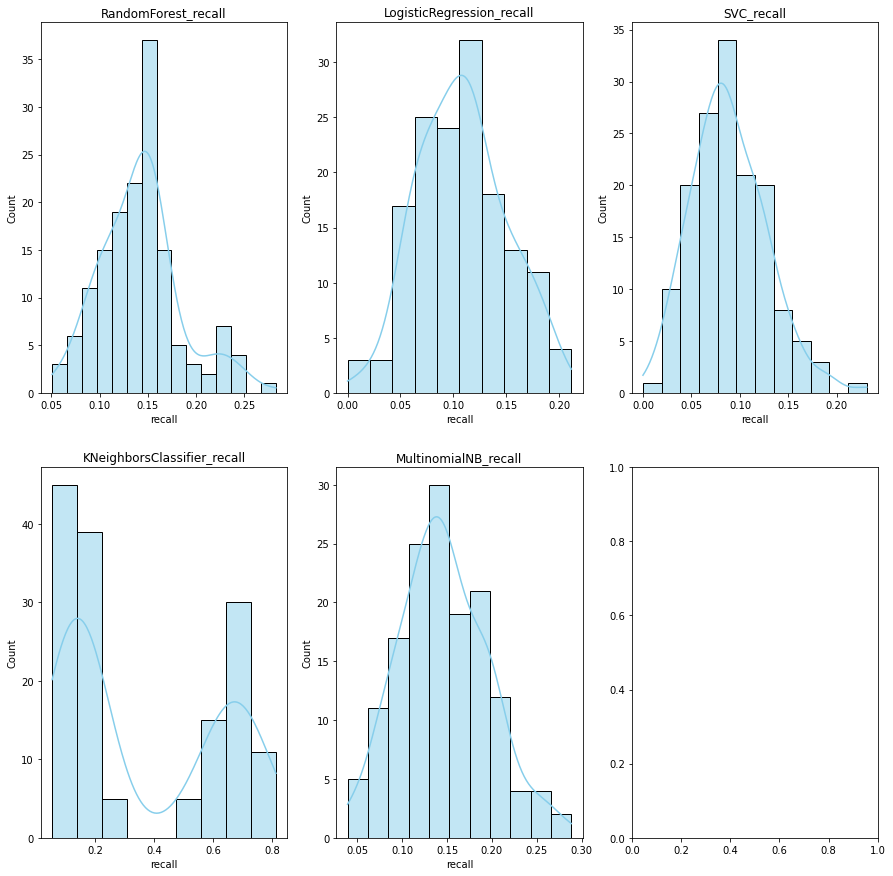

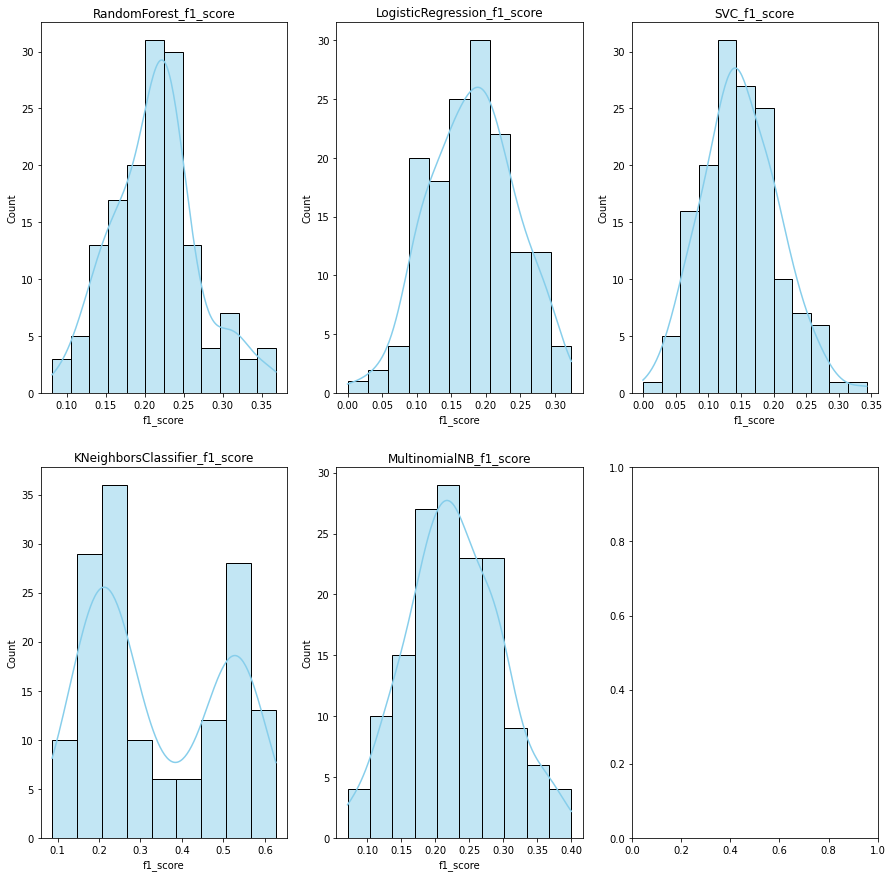

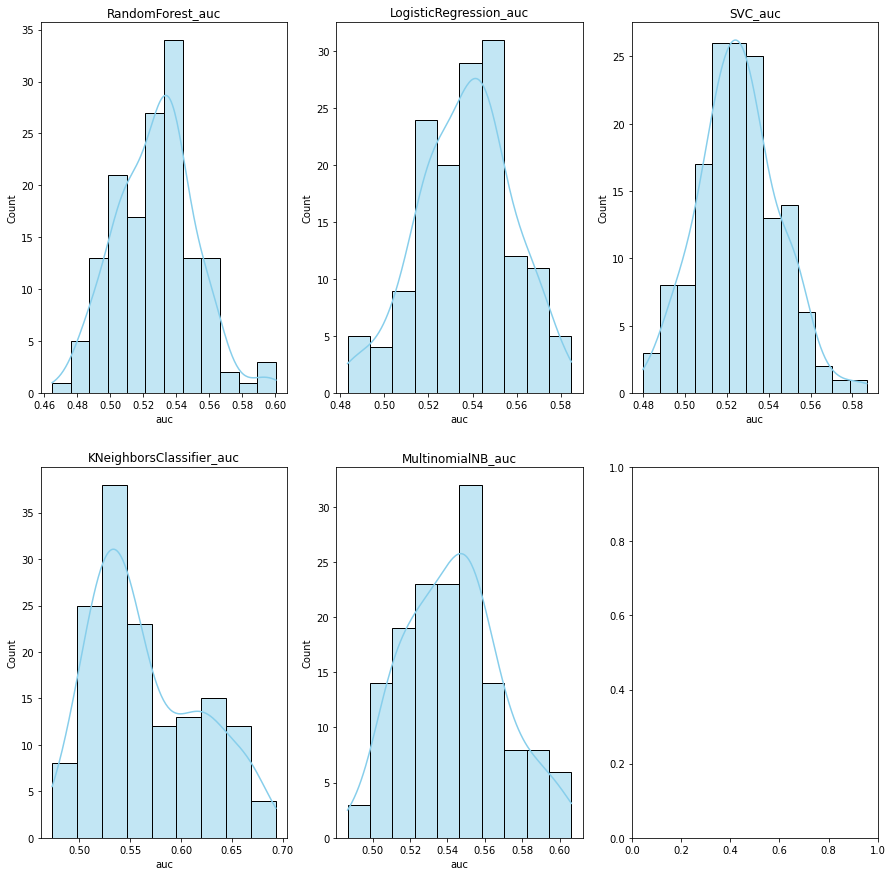

In [13]:
mod.reports()

# Chamando FastText

In [14]:
## Próxima melhoria